## ПЗ 1. Виконав студент КНТ-21-6 Дроздов Данило. Варіант 20 (Датасет "cancer").

In [5]:
from pycaret.datasets import get_data
data = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


### Опис ознак датасету `cancer`
- **Class** – Клас захворювання (0 – відсутність раку, 1 – наявність раку)
- **age** – Вік пацієнта (категоризовано)
- **menopause** – Менопаузальний статус (до або після менопаузи)
- **tumor-size** – Розмір пухлини (категоризовані значення)
- **inv-nodes** – Кількість уражених лімфатичних вузлів
- **node-caps** – Наявність капсуляції лімфатичних вузлів
- **deg-malig** – Ступінь злоякісності пухлини (1 – низька, 3 – висока)
- **breast** – Локалізація пухлини (ліва чи права грудь)
- **breast-quad** – Квадрант молочної залози, уражений пухлиною
- **irradiat** – Чи отримував пацієнт променеву терапію (0 – ні, 1 – так)


### Налаштування PyCaret для порівння моделей

In [8]:
from pycaret import classification

s = classification.setup(data=data, 
                         train_size=0.9, 
                         target='Class',
                         session_id=123)


,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(683, 10)"
4,Transformed data shape,"(683, 10)"
5,Transformed train set shape,"(614, 10)"
6,Transformed test set shape,"(69, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


### Порівняння моделей

In [10]:
best = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9756,0.9913,0.9771,0.9566,0.9658,0.9468,0.9480,0.4040
et,Extra Trees Classifier,0.9739,0.9953,0.9814,0.9475,0.9635,0.9432,0.9443,0.0520
rf,Random Forest Classifier,0.9691,0.9901,0.9630,0.9499,0.9559,0.9321,0.9327,0.0610
lr,Logistic Regression,0.9674,0.9954,0.9535,0.9542,0.9533,0.9283,0.9289,0.7460
lightgbm,Light Gradient Boosting Machine,0.9641,0.9941,0.9584,0.9420,0.9493,0.9216,0.9226,0.1130
gbc,Gradient Boosting Classifier,0.9626,0.9928,0.9587,0.9373,0.9473,0.9183,0.9191,0.0400
nb,Naive Bayes,0.9576,0.9842,0.9721,0.9160,0.9418,0.9086,0.9113,0.0100
ridge,Ridge Classifier,0.9561,0.9954,0.9121,0.9616,0.9350,0.9019,0.9039,0.0140
lda,Linear Discriminant Analysis,0.9561,0.9954,0.9121,0.9616,0.9350,0.9019,0.9039,0.0100
svm,SVM - Linear Kernel,0.9543,0.9953,0.9152,0.9556,0.9309,0.8971,0.9012,0.0100


In [12]:
print(best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


### Оцінка моделей
#### Оцінка через інтерактивний інтерфейс

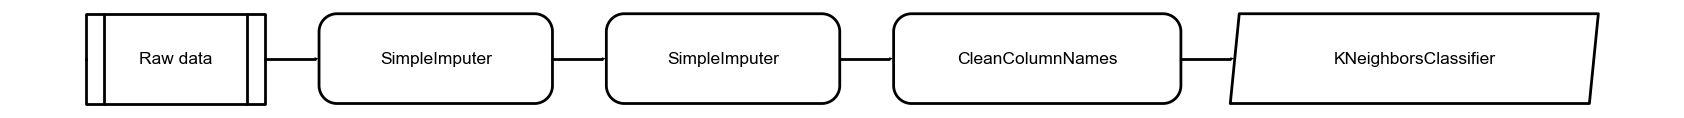

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
classification.evaluate_model(best)

#### Побудова матриці неточностей

#### Метод evaluate_model() відкриває інтерактивне вікно, де можна переглянути всі основні метрики моделі, графіки та статистику.


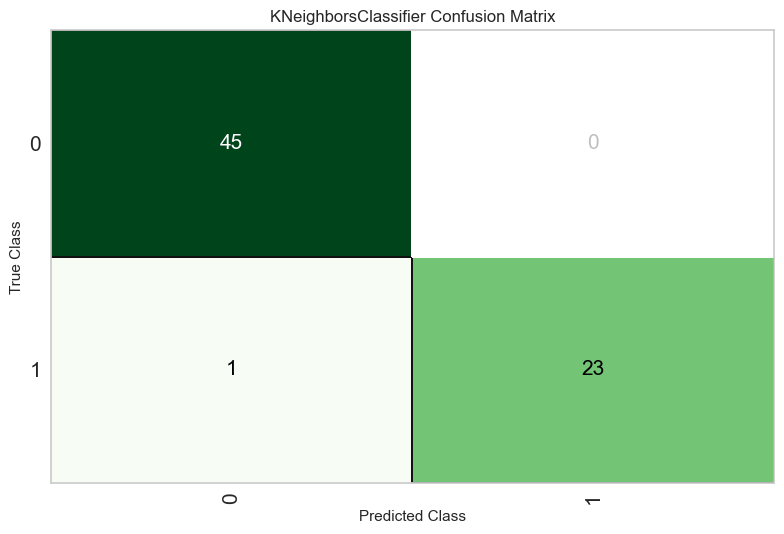

In [17]:
classification.plot_model(best, plot = 'confusion_matrix')

##### Метод plot_model() з параметром 'confusion_matrix' виводить матрицю неточностей, яка показує кількість правильних та неправильних передбачень моделі.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9516,0.9898,0.9091,0.9524,0.9302,0.8932,0.8938
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9839,0.9977,1.0000,0.9565,0.9778,0.9651,0.9657
3,0.9355,0.9932,0.9091,0.9091,0.9091,0.8591,0.8591
4,0.9672,0.9714,1.0000,0.9130,0.9545,0.9290,0.9313
5,0.9508,0.9643,0.9524,0.9091,0.9302,0.8923,0.8929
6,0.9508,0.9857,0.9048,0.9500,0.9268,0.8898,0.8904
7,0.9836,0.9988,1.0000,0.9545,0.9767,0.9641,0.9647
8,0.9836,1.0000,1.0000,0.9545,0.9767,0.9641,0.9647


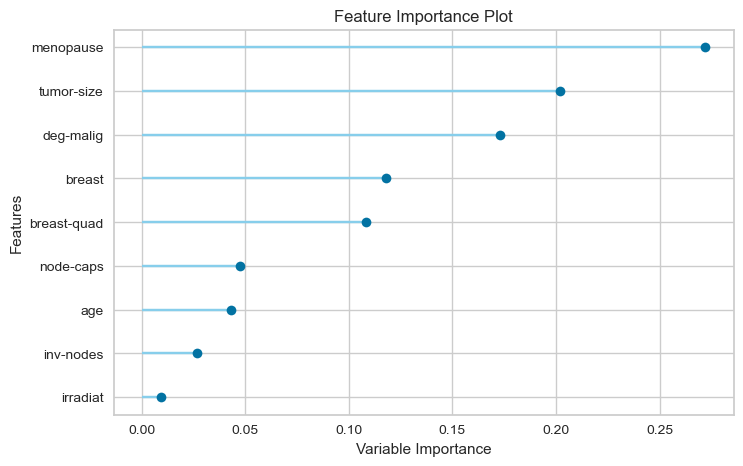

In [19]:
from pycaret.classification import create_model, plot_model

# Створення моделі, яка підтримує важливість ознак
rf_model = create_model('rf')  # RandomForestClassifier
# Побудова графіка важливості ознак
plot_model(rf_model, plot='feature')

#### Метод plot_model() з параметром 'feature' виводить графік важливості ознак, що демонструє, які ознаки найбільше впливають на результати моделі.

### Фіналізація моделі

In [22]:
final_model = classification.finalize_model(best)
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'menopause', 'tumor-size',
                                             'inv-nodes', 'node-caps',
                                             'deg-malig', 'breast',
                                             'breast-quad', 'irradiat'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('cat...
                                                              missing

### Прогноз, аналіз результатів та збереження моделі

In [25]:
predictions = classification.predict_model(final_model)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,prediction_label,prediction_score
325,8,5,5,5,2,10,4,3,1,1,1,1.0
189,4,1,1,1,2,1,3,1,1,0,0,1.0
175,1,1,1,1,2,1,1,1,1,0,0,1.0
472,10,10,10,10,6,10,8,1,5,1,1,1.0
128,5,1,3,1,2,1,2,1,1,0,0,1.0


#### Вивід записів з високим prediction_score

In [36]:
high_confidence = predictions[predictions['prediction_score'] > 0.9]
high_confidence

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,prediction_label,prediction_score
325,8,5,5,5,2,10,4,3,1,1,1,1.0
189,4,1,1,1,2,1,3,1,1,0,0,1.0
175,1,1,1,1,2,1,1,1,1,0,0,1.0
472,10,10,10,10,6,10,8,1,5,1,1,1.0
128,5,1,3,1,2,1,2,1,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
331,1,1,1,1,2,1,1,1,1,0,0,1.0
425,10,4,3,10,4,10,10,1,1,1,1,1.0
442,8,8,9,6,6,3,10,10,1,1,1,1.0
88,1,1,1,1,2,1,3,1,1,0,0,1.0


### Збереження моделі

In [31]:
classification.save_model(final_model, 'cancer_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'menopause', 'tumor-size',
                                              'inv-nodes', 'node-caps',
                                              'deg-malig', 'breast',
                                              'breast-quad', 'irradiat'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('cat...
                                                       

## Висновки

#### В ході лабораторної роботи було виконано класифікаційний аналіз датасету 'cancer' за допомогою PyCaret. Проведено порівняння класифікаційних моделей, обрано найкращу модель та зроблено прогноз для тестових даних. Найкраща модель збережена у форматі .pkl.

